**KNN Classification**

- **1.Collecting Data**
- **2.Preprocessing Data**
- **3.Train and Test the Data**
- **4.Model Creation**
- **5.Improve Model**


1.Collecting Data:

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('UniversalBank.csv')
data.head()

,ID,Gender,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,F,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,F,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,M,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,M,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,M,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


2.Preprocessing

In [4]:
data.columns

Index(['ID', 'Gender', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Personal Loan       5000 non-null   int64  
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              5000 non-null   int64  
 14  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

In [6]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [7]:
data['Gender']=lab.fit_transform(data['Gender'])
data['Gender']

0       0
1       1
2       2
3       2
4       2
       ..
4995    2
4996    2
4997    0
4998    0
4999    1
Name: Gender, Length: 5000, dtype: int32

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Gender              5000 non-null   int32  
 2   Age                 5000 non-null   int64  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   int64  
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Personal Loan       5000 non-null   int64  
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              5000 non-null   int64  
 14  CreditCard          5000 non-null   int64  
dtypes: float64(1), int32(1), int64(13)
memory usage: 566.5 

In [9]:
data.drop('ID',axis=1,inplace=True)

In [10]:
data.head(5)

,Gender,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,2,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,2,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
data.drop('ZIP Code',axis=1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int32  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 488.4 KB


In [13]:
data.shape

(5000, 13)

In [15]:
data.columns

Index(['Gender', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [16]:
X=data[['Gender', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online']]
y=data['CreditCard']

3.Train and Test the data

In [17]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
X_train.shape

(3500, 12)

In [25]:
X_test.shape

(1500, 12)

4.MOdel Creation

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#create object for Model
model=KNeighborsClassifier()

In [28]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
pred=model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

To Find accuracy score

In [29]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,pred)*100

63.733333333333334

ToFind Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,pred)

array([[894, 148],
       [396,  62]], dtype=int64)

In [37]:
369+148

517

In [38]:
894+62

956

In [46]:
data.sample(3)

,Gender,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3104,2,56,31,48,2,2.10,3,0,0,0,0,0,1
1250,2,47,20,81,1,2.67,2,0,0,0,0,1,0
4964,2,53,27,110,1,4.90,1,0,0,0,0,1,0


In [47]:
model.predict([[2,56,31,48,2,2.10,3,0,0,0,0,0]])

array([0], dtype=int64)

In [49]:
data.corr()

,Gender,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Gender,1.000000,-0.008584,-0.008882,-0.019492,-0.005205,-0.003502,0.009290,-0.028992,-0.031674,0.008118,-0.006784,-0.000244,0.002637
Age,-0.008584,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008882,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.019492,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.005205,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.003502,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.009290,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.028992,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.031674,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,0.008118,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [64]:
input_data=data[['CD Account','Experience']]

In [65]:
output_data=data['CreditCard']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_tr,X_te,y_tr,y_te=train_test_split(input_data,output_data,test_size=0.3)

In [68]:
X_tr.shape

(3500, 2)

In [69]:
X_te.shape

(1500, 2)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
model=KNeighborsClassifier(n_neighbors=5)

In [103]:
model.fit(X_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
pred=model.predict(X_te)

In [105]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [106]:
accuracy_score(y_te,pred)*100

67.73333333333333

In [107]:
confusion_matrix(y_te,pred)

array([[898, 171],
       [313, 118]], dtype=int64)

1016

484

### To Find Best K Value

In [83]:
k_values=[5,10,15,47,57,89,110]
score={}

In [92]:
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_tr,y_tr)
    score[k]=model.score(X_tr,y_tr)
    

In [86]:
score

{5: 0.6754285714285714,
 10: 0.732,
 15: 0.7174285714285714,
 47: 0.7048571428571428,
 57: 0.7031428571428572,
 89: 0.7031428571428572,
 110: 0.7031428571428572}

In [93]:
import matplotlib.pyplot as plt


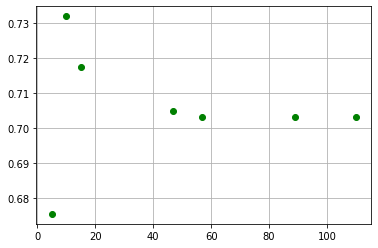

In [94]:
plt.scatter(score.keys(),score.values(),c='g')
plt.grid()
plt.show()

### KNN Regression

- 1.Collect The Data
- 2.PreProcess the data
- 3.Split the data for Traing and testing Purpose
- 4.Create the Model
- 5.Improve the Model

In [108]:
import pandas as pd

In [109]:
df=pd.read_csv('placement.csv')
df.head()

,Year,ECE,CSE,EEE,TotalPlacedData
0,1980,10.0,10.0,20,40.0
1,1981,50.0,50.0,25,125.0
2,1982,20.0,30.0,40,90.0
3,1983,152.0,50.0,45,247.0
4,1984,25.0,40.0,55,120.0


In [110]:
df.shape

(41, 5)

2.Preprocess the Data


In [111]:
df.isna().sum()

Year               0
ECE                0
CSE                0
EEE                0
TotalPlacedData    0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             41 non-null     int64  
 1   ECE              41 non-null     float64
 2   CSE              41 non-null     float64
 3   EEE              41 non-null     int64  
 4   TotalPlacedData  41 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


Split the data for testing and traing

In [114]:
df.columns

Index(['Year', 'ECE', 'CSE', 'EEE', 'TotalPlacedData'], dtype='object')

In [141]:
X=df[['Year', 'ECE', 'CSE', 'EEE']]
y=df['TotalPlacedData']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [144]:
X_train.shape

(28, 4)

In [145]:
X_test.shape

(13, 4)

In [146]:
from sklearn.neighbors import KNeighborsRegressor

In [147]:
# Create object for model
model=KNeighborsRegressor()

In [148]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [149]:
model.score(X_train,y_train)

0.895177667653771

In [150]:
model.score(X_test,y_test)

0.8905138606827467

In [151]:
df.sample()

,Year,ECE,CSE,EEE,TotalPlacedData
25,2005,65.0,124.0,244,433.0


In [152]:
model.predict([[2005,65.0,124.0,244]])

array([459.44])

In [127]:
df.corr()

,Year,ECE,CSE,EEE,TotalPlacedData
Year,1.000000,0.164618,0.428230,0.743775,0.726685
ECE,0.164618,1.000000,-0.035419,0.134450,0.406075
CSE,0.428230,-0.035419,1.000000,0.327913,0.707460
EEE,0.743775,0.134450,0.327913,1.000000,0.817531
TotalPlacedData,0.726685,0.406075,0.707460,0.817531,1.000000


In [154]:
import matplotlib.pyplot as plt

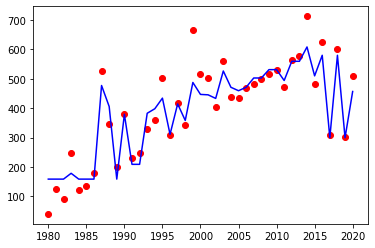

In [160]:
plt.scatter(df['Year'],df['TotalPlacedData'],c='r')
plt.plot(df['Year'],model.predict(df[['Year', 'ECE', 'CSE', 'EEE']]),c='b')